## DIABETES CLASSIFICATION MODEL

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

import warnings
warnings.filterwarnings('ignore')

In [26]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',80)
pd.set_option('display.width',5000)

In [27]:
data=pd.read_csv("diabetes.csv")

In [28]:
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
317,3,182,74,0,0,30.5,0.345,29,1
259,11,155,76,28,150,33.3,1.353,51,1
555,7,124,70,33,215,25.5,0.161,37,0
364,4,147,74,25,293,34.9,0.385,30,0
103,1,81,72,18,40,26.6,0.283,24,0


In [29]:
print("Pregnancies",data["Pregnancies"].unique())
print("\n")
print("BloodPressure",data["BloodPressure"].unique())
print("\n")
print("Insulin",data["Insulin"].unique())
print("\n")
print("Glucose",data["Glucose"].unique())
print("\n")
print("SkinThickness",data["SkinThickness"].unique())
print("\n")
print("BMI",data["BMI"].unique())
print("\n")
print("DiabetesPedigreeFunction",data["DiabetesPedigreeFunction"].unique())
print("\n")
print("Age",data["Age"].unique())

Pregnancies [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]


BloodPressure [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]


Insulin [  0  94 168  88 543 846 175 230  83  96 235 146 115 140 110 245  54 192
 207  70 240  82  36  23 300 342 304 142 128  38 100  90 270  71 125 176
  48  64 228  76 220  40 152  18 135 495  37  51  99 145 225  49  50  92
 325  63 284 119 204 155 485  53 114 105 285 156  78 130  55  58 160 210
 318  44 190 280  87 271 129 120 478  56  32 744 370  45 194 680 402 258
 375 150  67  57 116 278 122 545  75  74 182 360 215 184  42 132 148 180
 205  85 231  29  68  52 255 171  73 108  43 167 249 293  66 465  89 158
  84  72  59  81 196 415 275 165 579 310  61 474 170 277  60  14  95 237
 191 328 250 480 265 193  79  86 326 188 106  65 166 274  77 126 330 600
 185  25  41 272 321 144  15 183  91  46 440 159 540 200 335

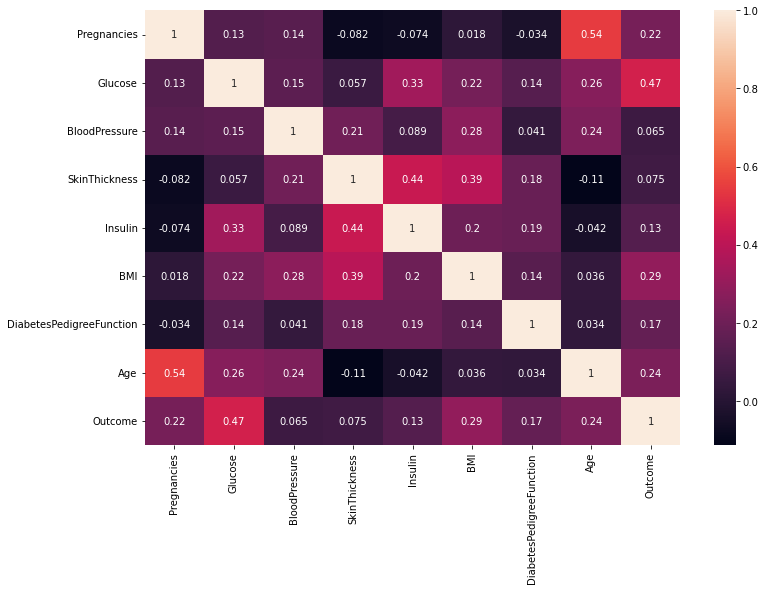

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot = True);

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
data.describe([0,0.05,0.50,0.95,0.99,1])

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
0%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
5%,0.000000,79.000000,38.700000,0.000000,0.000000,21.800000,0.140350,21.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
95%,10.000000,181.000000,90.000000,44.000000,293.000000,44.395000,1.132850,58.000000,1.000000
99%,13.000000,196.000000,106.000000,51.330000,519.900000,50.759000,1.698330,67.000000,1.000000
100%,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [33]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], dtype='object')

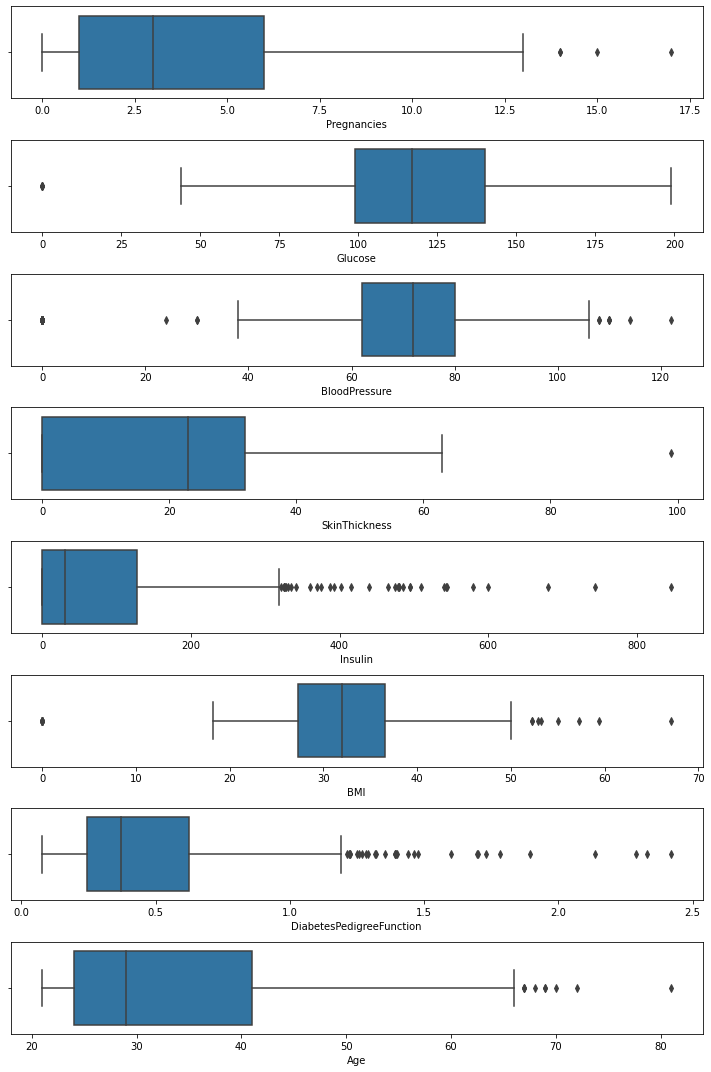

In [59]:
fig,axs=plt.subplots(8,figsize=(10,15))
plt1=sns.boxplot(data['Pregnancies'],ax=axs[0]);
plt2=sns.boxplot(data['Glucose'],ax=axs[1])
plt3=sns.boxplot(data['BloodPressure'],ax=axs[2])
plt4=sns.boxplot(data['SkinThickness'],ax=axs[3])
plt5=sns.boxplot(data['Insulin'],ax=axs[4])
plt6=sns.boxplot(data['BMI'],ax=axs[5])
plt7=sns.boxplot(data['DiabetesPedigreeFunction'],ax=axs[6])
plt8=sns.boxplot(data['Age'],ax=axs[7])

plt.tight_layout()

In [36]:
Insulin = data["Insulin"].replace(0,np.NAN)
Insulin=Insulin.replace(np.NAN,np.mean(Insulin))
SkinThickness=data["SkinThickness"].replace(0,np.NAN)
SkinThickness=SkinThickness.replace(np.NAN,np.mean(SkinThickness))

In [37]:
data1=data.drop(["Insulin","SkinThickness","Outcome"],axis=1)

In [38]:
data1["SkinThickness"]=SkinThickness
data1["Insulin"]=Insulin
data1["Outcome"]=data["Outcome"]

In [39]:
data1.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,SkinThickness,Insulin,Outcome
0,6,148,72,33.6,0.627,50,35.00000,155.548223,1
1,1,85,66,26.6,0.351,31,29.00000,155.548223,0
2,8,183,64,23.3,0.672,32,29.15342,155.548223,1
3,1,89,66,28.1,0.167,21,23.00000,94.000000,0
4,0,137,40,43.1,2.288,33,35.00000,168.000000,1


In [40]:
x = data1.iloc[:,:-1].values
y = data1.iloc[:, -1].values

In [41]:
print(x)
print(y)

[[  6.         148.          72.         ...  50.          35.
  155.54822335]
 [  1.          85.          66.         ...  31.          29.
  155.54822335]
 [  8.         183.          64.         ...  32.          29.15341959
  155.54822335]
 ...
 [  5.         121.          72.         ...  30.          23.
  112.        ]
 [  1.         126.          60.         ...  47.          29.15341959
  155.54822335]
 [  1.          93.          70.         ...  23.          31.
  155.54822335]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0

In [42]:
xtest,xtrain,ytest,ytrain=train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
model=LogisticRegression().fit(xtrain,ytrain)

In [44]:
#For theta_0:
print(model.intercept_ )
#For theta_1 and theta_2:
print(model.coef_ )

[-10.17629878]
[[ 0.3543109   0.03733715 -0.01297701  0.05772912  0.80785995 -0.0207229
   0.06835377  0.00247014]]


In [45]:
pred=model.predict(xtest)

In [46]:
cross_validation=cross_validate(estimator=model,
                                X=xtest,y=ytest,
                                scoring='accuracy',
                                cv=10,n_jobs=-1)

In [47]:
cross_validation["test_score"].mean()

0.7653622421998942

In [48]:
conf_matrix=confusion_matrix(ytest,pred)
conf_matrix

array([[343,  50],
       [103, 118]], dtype=int64)

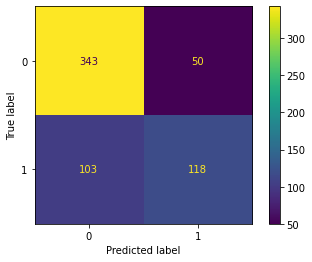

In [49]:
conf_matrix_display=ConfusionMatrixDisplay(conf_matrix).plot()

In [50]:
score=model.score(xtest,ytest)
print("accuracy of the model is ",score)

accuracy of the model is  0.750814332247557


## classification report

In [51]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       393
           1       0.70      0.53      0.61       221

    accuracy                           0.75       614
   macro avg       0.74      0.70      0.71       614
weighted avg       0.75      0.75      0.74       614



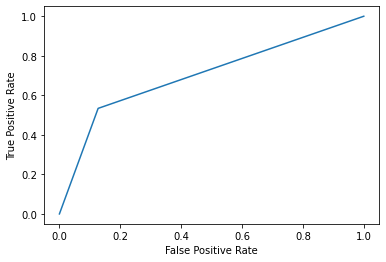

In [52]:
y_score=model.decision_function(xtest)
fpr,tpr,_=roc_curve(ytest,pred,pos_label=model.classes_[1])
roc_display=RocCurveDisplay(fpr=fpr,tpr=tpr).plot()

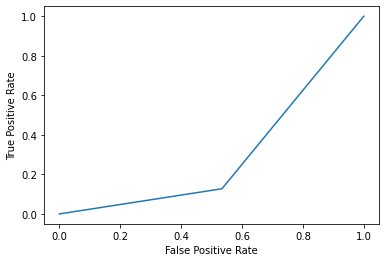

In [53]:
fpr,tpr,_=roc_curve(ytest,pred,pos_label=model.classes_[0])
roc_display=RocCurveDisplay(fpr=fpr,tpr=tpr).plot()

## now creating a graphical user interface for the user interection 

In [54]:
import tkinter as tk
from tkinter import *

In [55]:
def values():
    global preg
    preg=int(pregentry.get())
    global glucose
    glucose=float(Glucoseentry.get())
    global bp
    bp=float(BloodPressureentry.get())
    global bmi
    bmi=float(BMIentry.get())
    global dpf
    dpf=float(DiabetesPedigreeFunctionentry.get())
    global age
    age=int(Ageentry.get())
    global st
    st=float(SkinThicknessentry.get())
    global insulin
    insulin=float(Insulinentry.get())

    result=model.predict([[preg,glucose,bp,bmi,dpf,age,st,insulin]])
    if result==0:
        output="Non Diabetic"
    else:
        output="Diabetic"
    outcomeentry.delete(0,END)    
    outcomeentry.insert(0,str(output))

    

In [56]:
root=tk.Tk()

root.title("diabetes classification")

title=Label(root,text="DIABETES CHECK",bg="red",fg="yellow",font=('Arial Black',32),padx=30,pady=30)
title.grid(row=0,column=5)

Pregnancies=Label(root,text="Pregnancies",font=('Arial Black',18))
Pregnancies.grid(row=3,column=1)
pregentry=tk.Entry(root)
pregentry.grid(row=3,column=2,padx=30,pady=30)

Glucose=Label(root,text="Glucose",font=('Arial Black',18))
Glucose.grid(row=4,column=1)
Glucoseentry=tk.Entry(root)
Glucoseentry.grid(row=4,column=2,padx=30,pady=30)

BloodPressure=Label(root,text="BloodPressure",font=('Arial Black',18))
BloodPressure.grid(row=5,column=1)
BloodPressureentry=tk.Entry(root)
BloodPressureentry.grid(row=5,column=2,padx=30,pady=30)

BMI=Label(root,text="BMI",font=('Arial Black',18))
BMI.grid(row=6,column=1)
BMIentry=tk.Entry(root)
BMIentry.grid(row=6,column=2,padx=30,pady=30)

DiabetesPedigreeFunction=Label(root,text="DiabetesPedigreeFunction",font=('Arial Black',18))
DiabetesPedigreeFunction.grid(row=7,column=1)
DiabetesPedigreeFunctionentry=tk.Entry(root)
DiabetesPedigreeFunctionentry.grid(row=7,column=2,padx=30,pady=30)


Age=Label(root,text="Age",font=('Arial Black',18))
Age.grid(row=8,column=1)
Ageentry=tk.Entry(root)
Ageentry.grid(row=8,column=2,padx=30,pady=30)


SkinThickness=Label(root,text="SkinThickness",font=('Arial Black',18))
SkinThickness.grid(row=9,column=1)
SkinThicknessentry=tk.Entry(root)
SkinThicknessentry.grid(row=9,column=2,padx=30,pady=30)

Insulin=Label(root,text="Insulin",font=('Arial Black',18))
Insulin.grid(row=10,column=1)
Insulinentry=tk.Entry(root)
Insulinentry.grid(row=10,column=2,padx=30,pady=30)

outcome=Label(root,text="outcome",font=('Arial Black',18))
outcome.grid(row=7,column=5)
outcomeentry=tk.Entry(root)
outcomeentry.grid(row=7,column=6)

button=tk.Button(root,text="calculate",command=values,bg="orange",fg="black",font=('Arial Black',32))
button.grid(row=6,column=5)

In [57]:
data1.sample(1)

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,SkinThickness,Insulin,Outcome
345,8,126,88,38.5,0.349,49,36.0,108.0,0


In [58]:
root.mainloop()

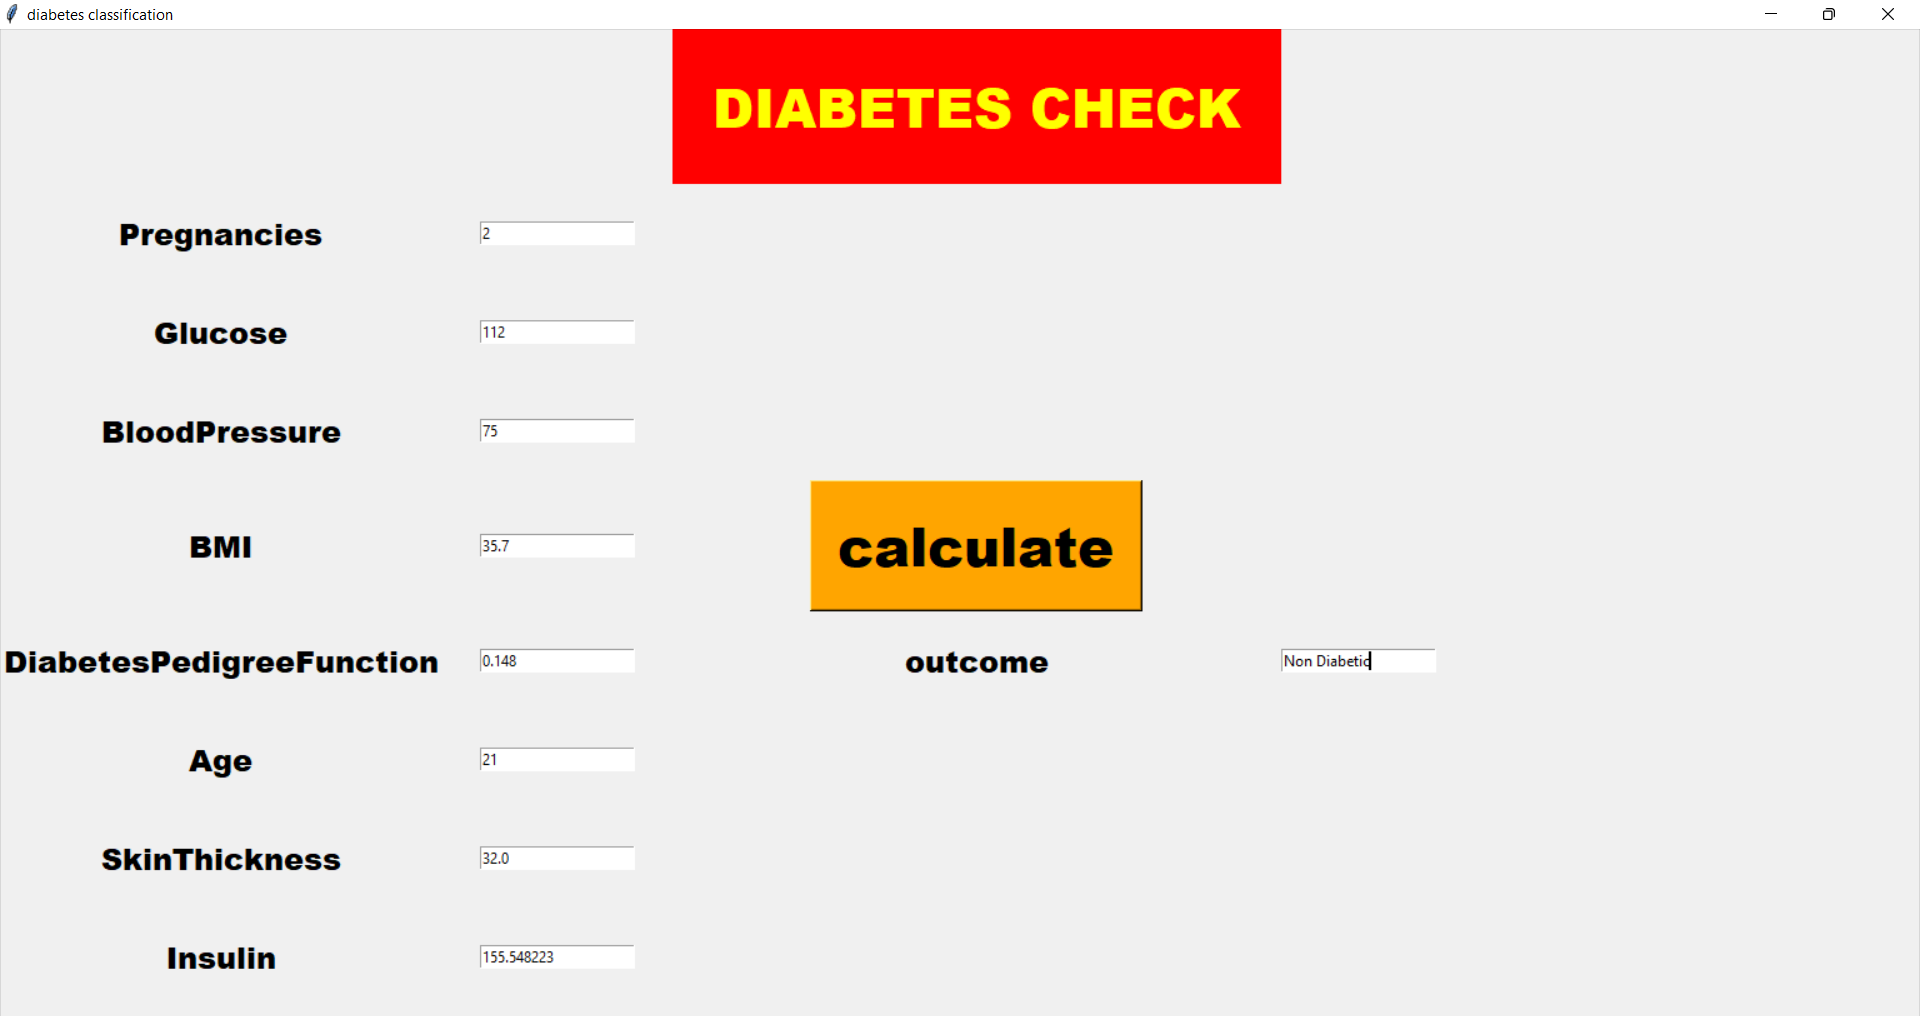